<a href="https://colab.research.google.com/github/barrosyan/computational_physics_studies/blob/main/PINN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dirac equation

---



In [64]:
!pip install pyglet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")
import imageio
import os
from tqdm import tqdm
import time
import pyglet
# Reference: https://github.com/BryceWayne/Dirac

In [65]:
path = os.getcwd()

path_2d = os.path.join(path, '2D')
path_3d = os.path.join(path, '3D')

def chdir(path):
    if not os.path.isdir(path):
        os.mkdir(path)
    os.chdir(path)

In [66]:
def init(x, sigma):
#     u = np.exp(-(sigma*x)**2/2)*np.prod([np.exp(1j*k*x) for k in range(-100000, 100001)])
    u = np.exp(-(sigma*x)**2/2)
    return u

def build_x(x_min, x_max, dx):
    return np.round(np.arange(x_min, x_max + dx, dx), 8)

def build_t(t_min, t_max, dt):
    dt = round(dt, 8)
    return np.round(np.arange(t_min, t_max + dt, dt), 8)

def LF(t, x, init):
    u = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    v = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    for tt in tqdm(range(len(t))):
        if tt == 0:
            z = init(x)
            u[tt, :] = z
            v[tt, :] = np.zeros_like(z)
        elif tt == 1:
            u[tt,:] = u[0, :]
            v[tt,:] = v[0, :]
        else:
            for xx in range(len(x)):
                if xx == 0 or xx == len(x) - 1:
                    u[tt, xx] = 0
                    v[tt, xx] = 0
                else:
                    u[tt, xx] = u[tt-2, xx] - l*(v[tt-1, xx+1]-v[tt-1, xx-1])-1j*dt*u[tt-1, xx]
                    v[tt, xx] = v[tt-2, xx] - l*(u[tt-1, xx+1]-u[tt-1, xx-1])+1j*dt*v[tt-1, xx]
    return u, v

In [67]:
t_min, t_max = 0, 50
x_min, x_max = -50, 50
sigma = 0.2
h, l = 0.1, 0.1
dx, dt = h, np.round(h*l, 8)

x = build_x(x_min, x_max, dx)
t = build_t(t_min, t_max, dt)
print("M: {0}, N:{1}".format(len(x), len(t)))
time.sleep(1)

u, v = LF(t, x, lambda x: init(x,sigma))

M: 1001, N:5001


100%|██████████| 5001/5001 [00:20<00:00, 242.91it/s]


In [59]:
# Compute the probability density
probability_density = np.abs(psi)**2

<ipython-input-59-99700af8c725>:2: RuntimeWarning:

overflow encountered in square



In [68]:
def plot_u_v(zz, count, do_show=False):
    plt.figure(figsize=(10,8))
    plt.plot(x, u[zz,:].real, 'r', label=r'$\psi_1$ R')
    plt.plot(x, u[zz,:].imag, 'r--', label=r'$\psi_1$ I')
    plt.plot(x, v[zz,:].real, 'k', label=r'$\psi_4$ R')
    plt.plot(x, v[zz,:].imag, 'k--', label=r'$\psi_4$ I')
    plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[zz], 4), sigma))
    plt.ylabel(r'$\psi$')
    plt.xlabel(r'$x$')
    plt.grid(alpha=0.618)
    plt.ylim(-ymax,ymax)
    plt.legend()
    if do_show: plt.show()
    else: plt.savefig('G{:03d}'.format(count)+'.png')
    plt.close()

chdir(path_2d)
count = 0
ymax = 1

for zz in tqdm(range(0, len(u[:,0]), 50)):
    plot_u_v(zz, count)
    count += 1

plot_u_v(-1, count)

100%|██████████| 101/101 [00:34<00:00,  2.89it/s]


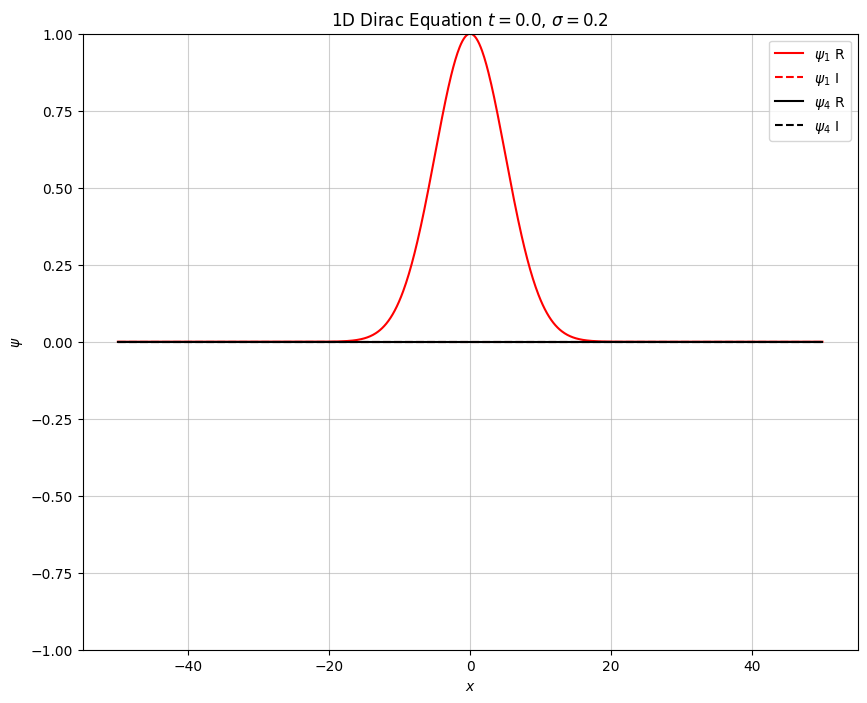

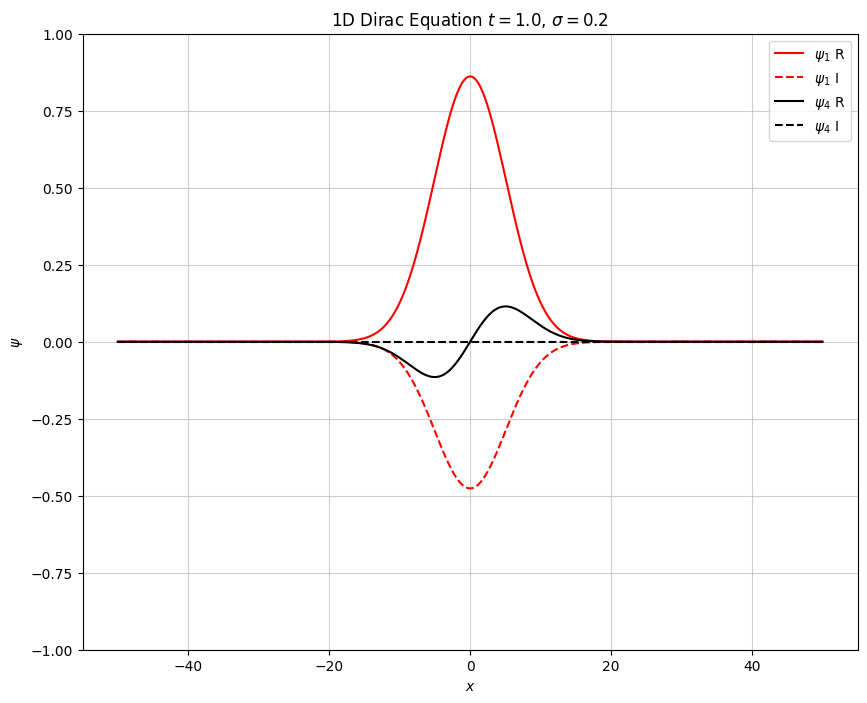

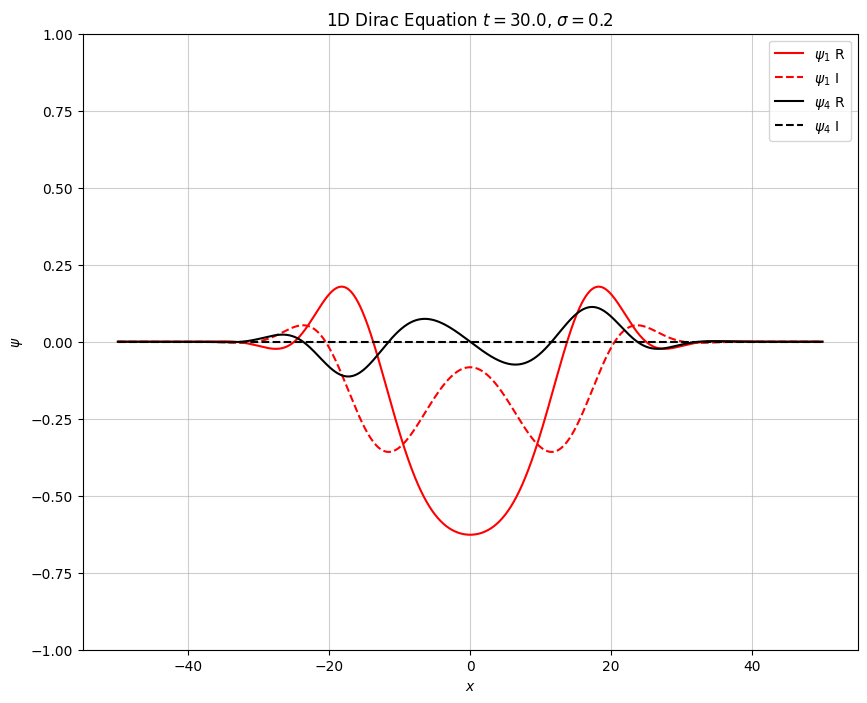

In [69]:
plot_u_v(0, 0, do_show=True)
plot_u_v(100, 0, do_show=True)
plot_u_v(3000, 0, do_show=True)

In [70]:
def P(psi1, psi2):
    return np.conj(psi1)*psi1+np.conj(psi2)*psi2

def J(psi1, psi2):
    return np.conj(psi1)*psi2+np.conj(psi2)*psi1

p = P(u, v)
j = J(u, v)

def plot_p_j(jj, count, do_show=False):
    plt.figure(figsize=(10,8))
    plt.plot(x, j[jj,:], 'b', label='Current')
    plt.plot(x, p[jj,:], 'r', label='Probability Denisty')
    #plt.plot(x, j[jj,:].imag, 'b', label='Current I')
    plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[jj], 4), sigma))
    plt.ylabel(r'Amplitude')
    plt.xlabel(r'$x$')
    plt.grid(alpha=0.618)
    plt.legend()
    plt.ylim(-ymax,ymax)
    if do_show: plt.show()
    else: plt.savefig('H{:03d}'.format(count)+'.png')
    plt.close()

chdir(path_2d)
ymax = 1
count = 0
for jj in tqdm(range(0, len(j[:,0]), 50)):
    plot_p_j(jj, count)
    count += 1

plot_p_j(-1, count)

100%|██████████| 101/101 [00:29<00:00,  3.46it/s]


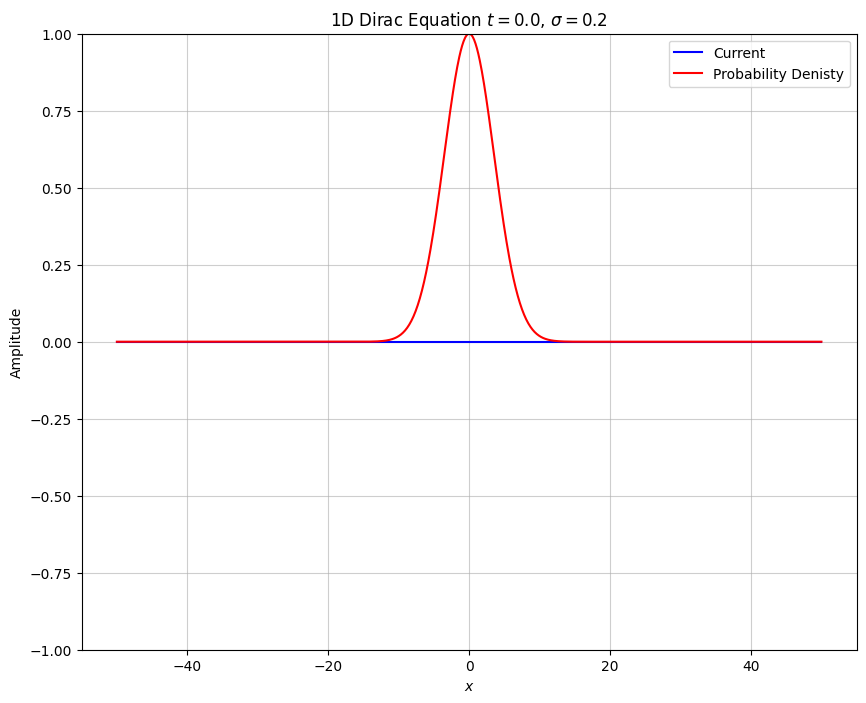

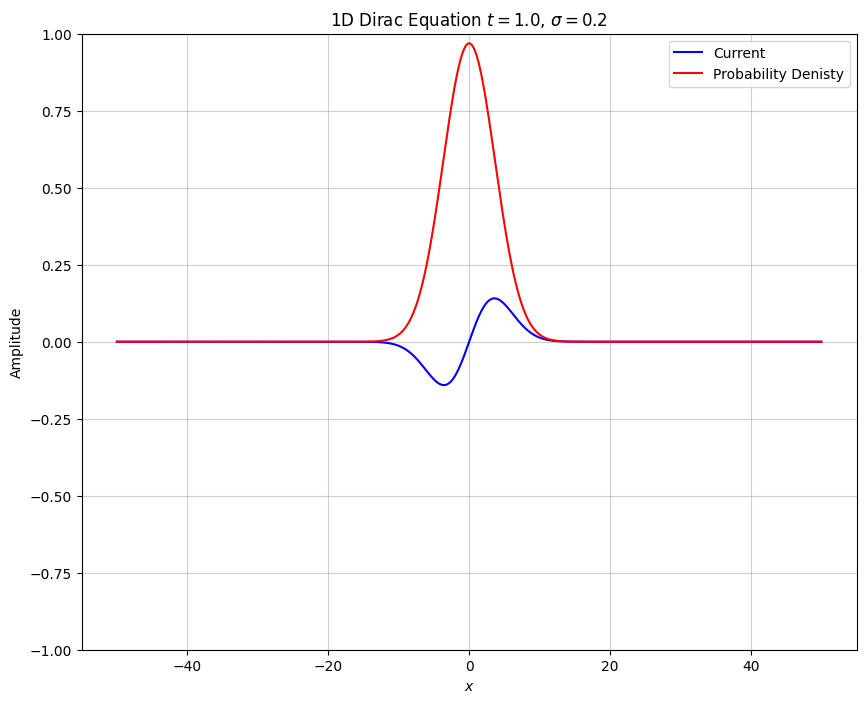

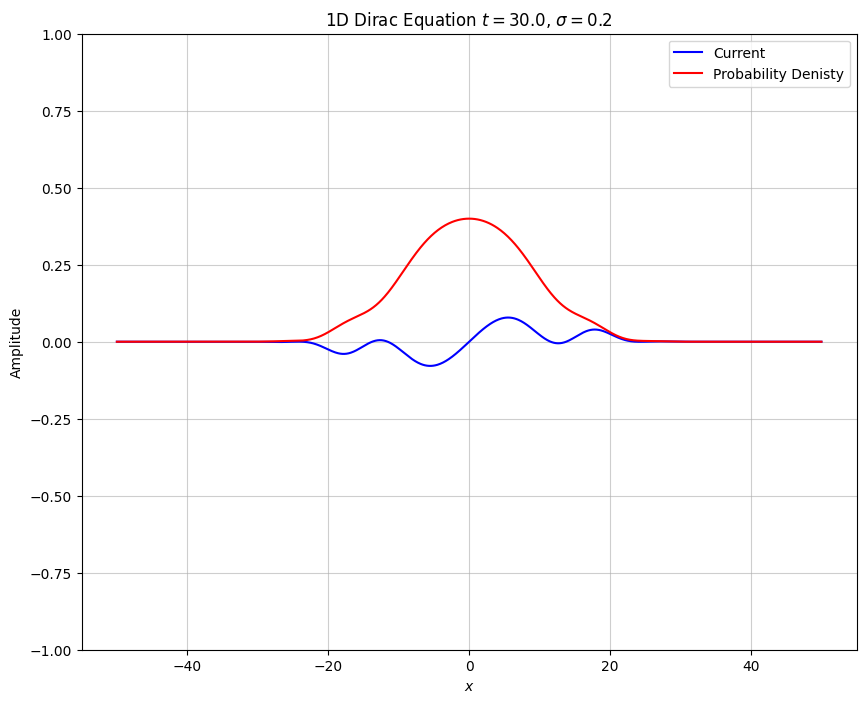

In [71]:
plot_p_j(0, 0, do_show=True)
plot_p_j(100, 0, do_show=True)
plot_p_j(3000, 0, do_show=True)

In [73]:
def plot_3d(zz, count = 0, show=False):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_ylim(-ymax,ymax)
    ax.set_zlim(-ymax,ymax)
    ax.view_init(elev=20, azim=70)
    ax.plot(range(len(x)), u[zz,:].imag, u[zz,:].real, label='$psi_1$')
    ax.plot(range(len(x)), v[zz,:].imag, v[zz,:].real, label='$psi_4$')
    plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[zz], 4), sigma))
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'Im($\psi$)')
    ax.set_zlabel(r'Re($\psi$)')
    plt.legend()
    if show: fig.show()
    else:
        fig.savefig('X{:03d}'.format(count)+'.png')
        plt.close()

chdir(path_3d)
for count, zz in tqdm(enumerate(range(0, len(u[:,0]), 50))):
  plot_3d(zz, count)

101it [00:34,  2.89it/s]


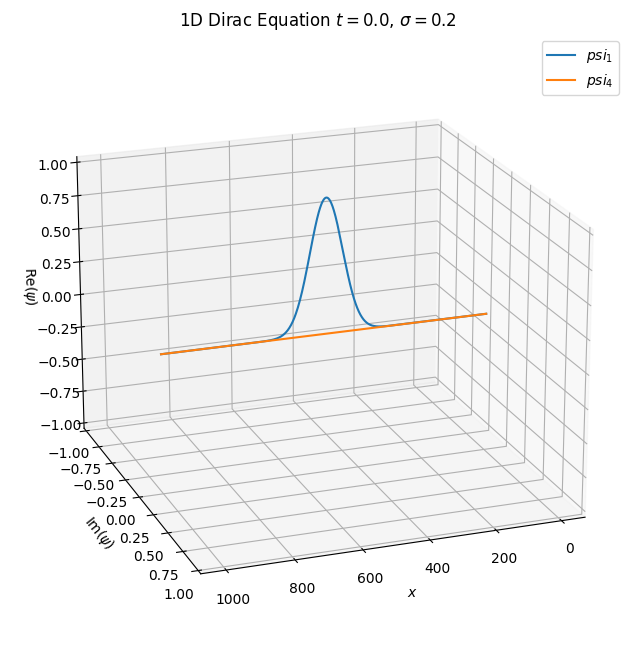

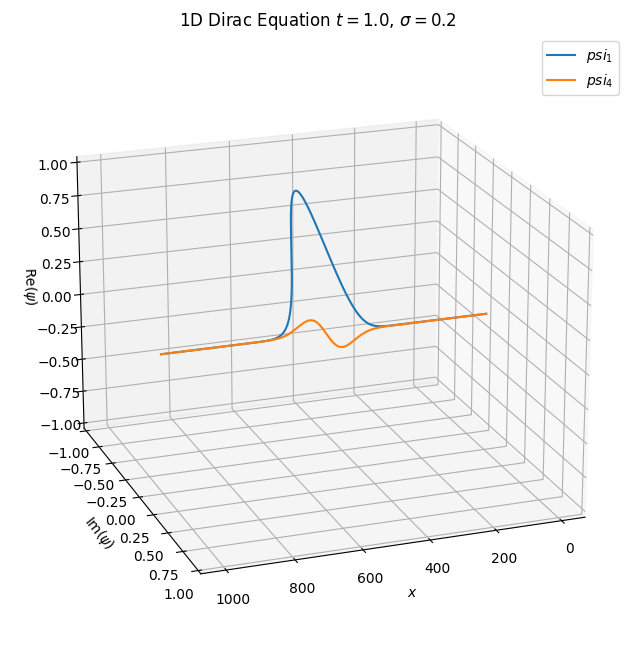

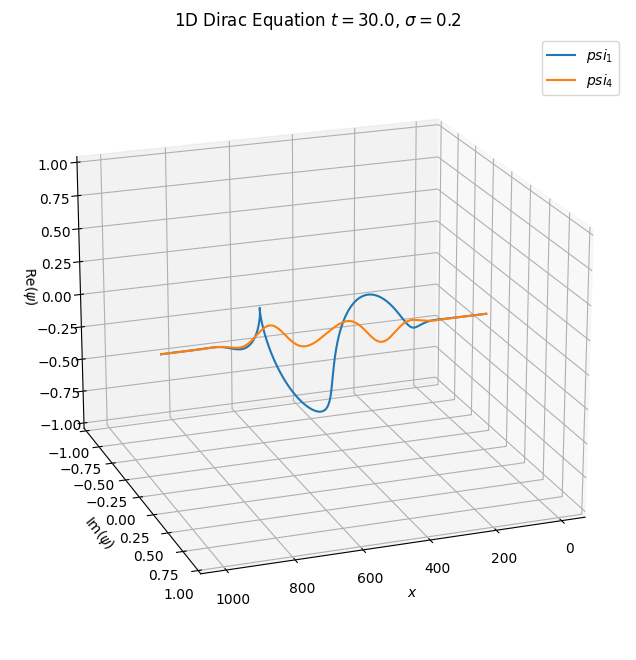

In [74]:
plot_3d(0, show=True)
plot_3d(100, show=True)
plot_3d(3000, show=True)

# Lane-Emden equation

---

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def lane_emden(n, num_points):
    # Define the polytropic index
    gamma = n + 1

    # Define the initial conditions
    xi_0 = 0.0
    theta_0 = 1.0
    dtheta_0 = 0.0

    # Define the grid
    xi = np.linspace(xi_0, 10, num_points)
    dxi = xi[1] - xi[0]

    # Initialize arrays for the solution
    theta = np.zeros_like(xi)
    dtheta = np.zeros_like(xi)
    theta[0] = theta_0
    dtheta[0] = dtheta_0

    # Solve the Lane-Emden equation using the finite difference method
    for i in range(1, num_points):
        theta[i] = theta[i-1] + dtheta[i-1] * dxi
        dtheta[i] = dtheta[i-1] - (2/xi[i]) * dtheta[i-1] * dxi - theta[i-1]**n * dxi

    return xi, theta

In [16]:
# Solve the Lane-Emden equation for n = 1.5
xi, theta = lane_emden(1.5, 1000)

<ipython-input-15-3b3e34d97c75>:23: RuntimeWarning: invalid value encountered in double_scalars
  dtheta[i] = dtheta[i-1] - (2/xi[i]) * dtheta[i-1] * dxi - theta[i-1]**n * dxi


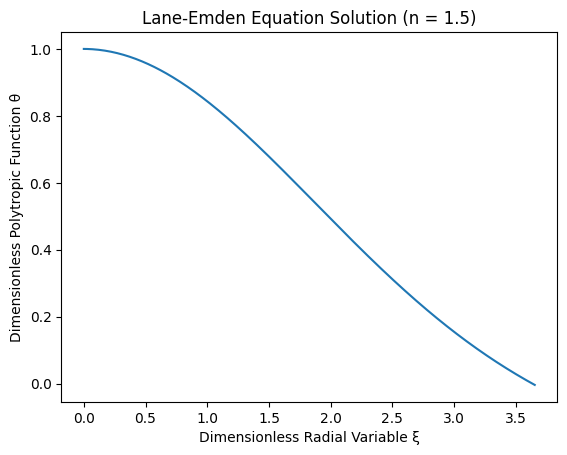

In [17]:
# Plot the solution
fig, ax = plt.subplots()
ax.plot(xi, theta)
ax.set_xlabel('Dimensionless Radial Variable ξ')
ax.set_ylabel('Dimensionless Polytropic Function θ')
ax.set_title('Lane-Emden Equation Solution (n = 1.5)')
plt.show()

# Einstein field equations

----

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def metric_tensor(r, M):
    # Define the metric tensor components g_tt, g_rr, and g_phph
    g_tt = 1 - (2 * M / r)
    g_rr = 1 / (1 - (2 * M / r))
    g_phph = r**2

    # Return the metric tensor components
    return g_tt, g_rr, g_phph

In [21]:
def ricci_tensor(r, M):
    # Compute the Ricci tensor components R_tt, R_rr, and R_phph
    g_tt, g_rr, g_phph = metric_tensor(r, M)

    R_tt = 3 * M / (r**3) * (g_tt - 1) * (g_rr - 1)
    R_rr = -3 * M / (r**2) * (g_tt - 1)**2
    R_phph = -1 / (2 * r) * (2 * M * (g_rr - 1) - r * (g_rr - 1).diff(r))

    # Return the Ricci tensor components
    return R_tt, R_rr, R_phph

In [22]:
def stress_energy_tensor(r, M):
    # Compute the stress-energy tensor components T_tt, T_rr, and T_phph
    g_tt, g_rr, g_phph = metric_tensor(r, M)

    T_tt = 3 * M / (8 * np.pi * r**3) * (1 - g_tt) * (1 - g_rr)
    T_rr = -3 * M / (8 * np.pi * r**2) * (1 - g_tt)**2
    T_phph = -1 / (8 * np.pi * r) * (1 - g_rr)

    # Return the stress-energy tensor components
    return T_tt, T_rr, T_phph

In [23]:
def solve_einstein_equations(r, M, max_iterations=1000, tolerance=1e-6):
    # Discretization parameters
    num_points = len(r)
    dr = r[1] - r[0]

    # Initialize arrays for the metric functions and their derivatives
    g_tt = np.zeros(num_points)
    g_rr = np.zeros(num_points)
    g_phph = np.zeros(num_points)

    # Set initial conditions at r = r_min
    g_tt[0], g_rr[0], g_phph[0] = metric_tensor(r[0], M)

    # Solve the Einstein field equations using finite differencing
    for iteration in range(1, max_iterations + 1):
        g_tt_old = g_tt.copy()
        g_rr_old = g_rr.copy()
        g_phph_old = g_phph.copy()

        for i in range(1, num_points):
            g_tt[i] = g_tt_old[i-1] + dr * (-2 * M * g_tt_old[i-1] / (r[i-1]**2) - (1 / r[i-1]) * (g_tt_old[i-1] - 1) * (g_rr_old[i-1] - 1))
            g_rr[i] = g_rr_old[i-1] + dr * (-2 * M * (g_rr_old[i-1] - 1) / r[i-1] - (1 / r[i-1]) * (g_tt_old[i-1] - 1)**2)
            g_phph[i] = g_phph_old[i-1] + dr * (-1 / (2 * r[i-1]) * (2 * M * (g_rr_old[i-1] - 1) - r[i-1] * (g_rr_old[i-1] - 1)))

        # Check for convergence
        if np.max(np.abs(g_tt - g_tt_old)) < tolerance and np.max(np.abs(g_rr - g_rr_old)) < tolerance and np.max(np.abs(g_phph - g_phph_old)) < tolerance:
            break

    # Return the metric functions
    return g_tt, g_rr, g_phph

In [24]:
# Define constants
M = 1.989e30  # Mass of the object (e.g., Sun) in kg

# Define the radial grid
r_min = 10e3   # Minimum radial distance
r_max = 10e7   # Maximum radial distance
num_points = 1000
r = np.linspace(r_min, r_max, num_points)

In [25]:
# Solve the Einstein field equations
g_tt, g_rr, g_phph = solve_einstein_equations(r, M)

<ipython-input-23-23537f50c373>:21: RuntimeWarning: overflow encountered in double_scalars
  g_tt[i] = g_tt_old[i-1] + dr * (-2 * M * g_tt_old[i-1] / (r[i-1]**2) - (1 / r[i-1]) * (g_tt_old[i-1] - 1) * (g_rr_old[i-1] - 1))
<ipython-input-23-23537f50c373>:22: RuntimeWarning: overflow encountered in double_scalars
  g_rr[i] = g_rr_old[i-1] + dr * (-2 * M * (g_rr_old[i-1] - 1) / r[i-1] - (1 / r[i-1]) * (g_tt_old[i-1] - 1)**2)
<ipython-input-23-23537f50c373>:21: RuntimeWarning: invalid value encountered in double_scalars
  g_tt[i] = g_tt_old[i-1] + dr * (-2 * M * g_tt_old[i-1] / (r[i-1]**2) - (1 / r[i-1]) * (g_tt_old[i-1] - 1) * (g_rr_old[i-1] - 1))
<ipython-input-23-23537f50c373>:22: RuntimeWarning: invalid value encountered in double_scalars
  g_rr[i] = g_rr_old[i-1] + dr * (-2 * M * (g_rr_old[i-1] - 1) / r[i-1] - (1 / r[i-1]) * (g_tt_old[i-1] - 1)**2)
<ipython-input-23-23537f50c373>:23: RuntimeWarning: invalid value encountered in double_scalars
  g_phph[i] = g_phph_old[i-1] + dr * (-1 /

In [26]:
# Compute the stress-energy tensor components
T_tt, T_rr, T_phph = stress_energy_tensor(r, M)

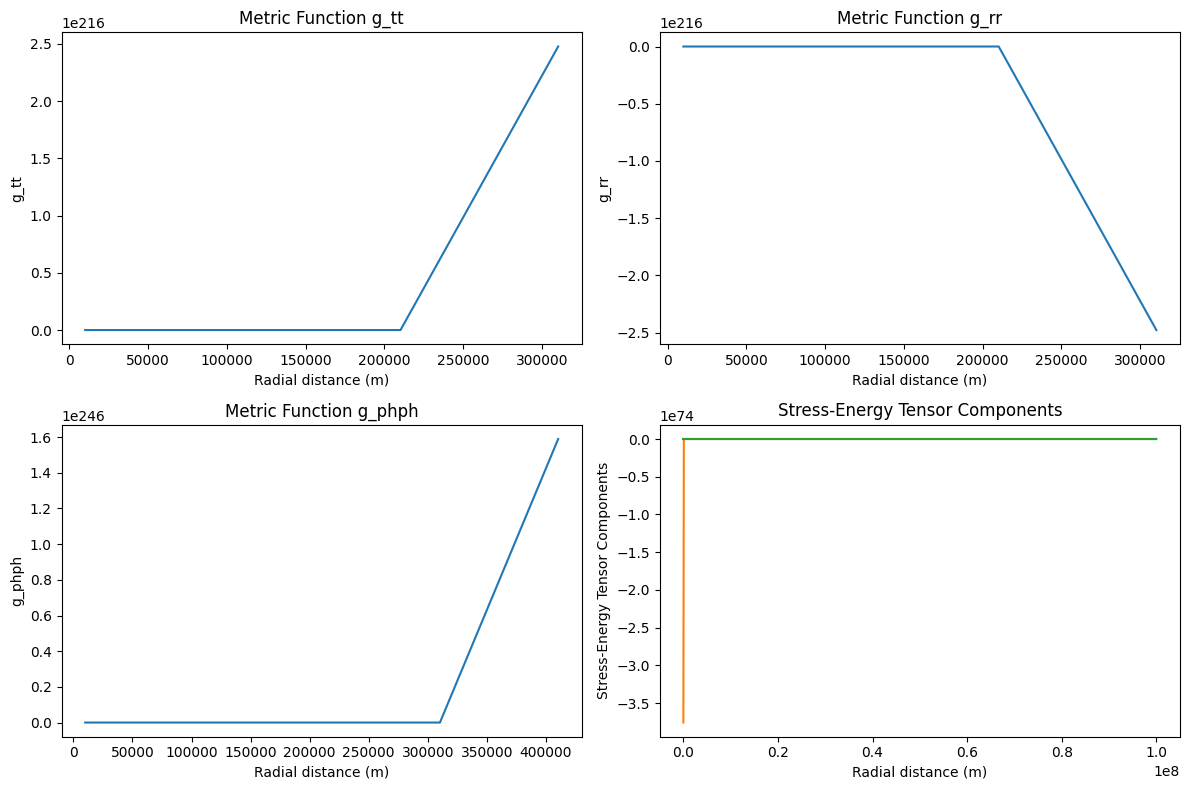

In [27]:
# Plot the metric functions and stress-energy tensor components
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Metric functions
axs[0, 0].plot(r, g_tt, label='g_tt')
axs[0, 0].set_xlabel('Radial distance (m)')
axs[0, 0].set_ylabel('g_tt')
axs[0, 0].set_title('Metric Function g_tt')

axs[0, 1].plot(r, g_rr, label='g_rr')
axs[0, 1].set_xlabel('Radial distance (m)')
axs[0, 1].set_ylabel('g_rr')
axs[0, 1].set_title('Metric Function g_rr')

axs[1, 0].plot(r, g_phph, label='g_phph')
axs[1, 0].set_xlabel('Radial distance (m)')
axs[1, 0].set_ylabel('g_phph')
axs[1, 0].set_title('Metric Function g_phph')

# Stress-energy tensor components
axs[1, 1].plot(r, T_tt, label='T_tt')
axs[1, 1].plot(r, T_rr, label='T_rr')
axs[1, 1].plot(r, T_phph, label='T_phph')
axs[1, 1].set_xlabel('Radial distance (m)')
axs[1, 1].set_ylabel('Stress-Energy Tensor Components')
axs[1, 1].set_title('Stress-Energy Tensor Components')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Boltzmann Equations
---

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Define constants and parameters
N = 100  # Number of grid points
T = 1.0  # Temperature
dt = 0.01  # Time step size
t_max = 1.0  # Maximum simulation time

In [43]:
# Initialize the distribution function with a Gaussian profile
vx = np.linspace(-3, 3, N)
vy = np.linspace(-3, 3, N)
Vx, Vy = np.meshgrid(vx, vy)
f = np.exp(-(Vx**2 + Vy**2) / (2 * T))

In [44]:
# Define the collision operator
def collision_operator(f):
    # Compute the equilibrium distribution function
    f_eq = np.exp(-(Vx**2 + Vy**2) / (2 * T))

    # Compute the collision term
    collision_term = -f * (f - f_eq)
    return collision_term

# Define the equilibrium distribution function
def equilibrium_distribution(vx, vy):
    return np.exp(-(vx**2 + vy**2) / (2 * T))

In [45]:
# Perform numerical simulation
t = 0.0
while t < t_max:
    # Compute the collision term
    collision_term = collision_operator(f)

    # Update the distribution function
    f += dt * collision_term

    # Increment the time
    t += dt

In [46]:
# Compute the marginal distribution along the vx axis
marginal_distribution = np.sum(f, axis=1)

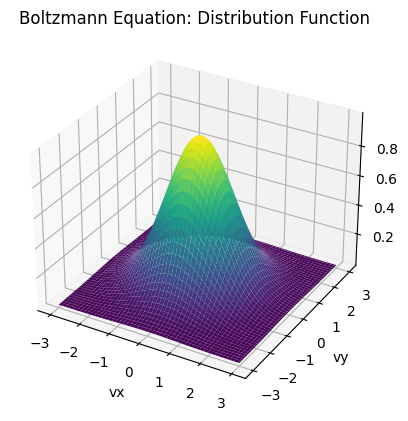

In [48]:
# Create a 3D plot of the distribution function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Vx, Vy, f, cmap='viridis')
ax.set_xlabel('vx')
ax.set_ylabel('vy')
ax.set_zlabel('f')
ax.set_title('Boltzmann Equation: Distribution Function')
plt.show()

# Klein-Gordon Equation
---

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Parameters
L = 10  # Spatial domain [-L, L]
N = 1000  # Number of spatial grid points
T = 1  # Total time
dt = 0.001  # Time step size
c = 1  # Speed of light
hbar = 1  # Reduced Planck constant
m = 1  # Particle mass

In [77]:
# Spatial grid
x = np.linspace(-L, L, N)
dx = x[1] - x[0]

# Time grid
t = np.arange(0, T, dt)
Nt = len(t)

In [78]:
# Wavefunction
phi = np.zeros((N, Nt))
phi[:, 0] = np.exp(-(x ** 2) / 2)  # Initial condition

In [79]:
# Finite difference coefficients
alpha = (c * dt / dx) ** 2
beta = (hbar ** 2 * dt ** 2) / (2 * m * dx ** 2)

In [80]:
# Solve the Klein-Gordon equation
for n in range(Nt - 1):
    phi[1:N - 1, n + 1] = 2 * (1 - alpha - beta) * phi[1:N - 1, n] - phi[1:N - 1, n - 1] \
                         + alpha * (phi[2:N, n] + phi[0:N - 2, n]) + beta * (phi[2:N, n] - 2 * phi[1:N - 1, n] + phi[0:N - 2, n])

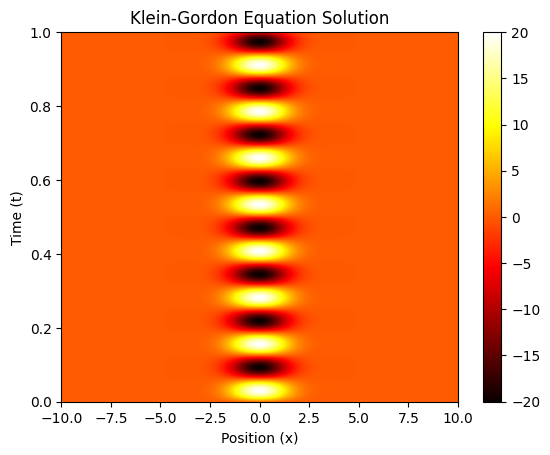

In [81]:
# Plot the results
plt.imshow(phi.T, origin='lower', extent=(-L, L, 0, T), aspect='auto', cmap='hot')
plt.colorbar()
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Klein-Gordon Equation Solution')
plt.show()

# Newton's differential equations
---

In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def newton_equation(x, t):
    # Define the force function F(x)
    # Modify this function according to your specific problem
    F = -k * x  # Example: Simple harmonic motion with spring constant k

    # Calculate acceleration (second derivative of x with respect to t)
    acceleration = F / m

    return acceleration

In [151]:
# Parameters
m = 1.0  # Mass of the particle
k = 1.0  # Spring constant

# Initial conditions
x0 = 0.0  # Initial position
v0 = 1.0  # Initial velocity

# Time parameters
t_start = 0.0
t_end = 10.0
dt = 0.01
num_points = int((t_end - t_start) / dt) + 1
t = np.linspace(t_start, t_end, num_points)

In [152]:
# Arrays to store position and velocity values
x = np.zeros(num_points)
v = np.zeros(num_points)

# Set initial values
x[0] = x0
v[0] = v0

In [153]:
# Numerical integration using Euler method
for i in range(1, num_points):
    # Calculate acceleration at the current time step
    acceleration = newton_equation(x[i-1], t[i-1])

    # Update position and velocity using Euler method
    x[i] = x[i-1] + v[i-1] * dt
    v[i] = v[i-1] + acceleration * dt

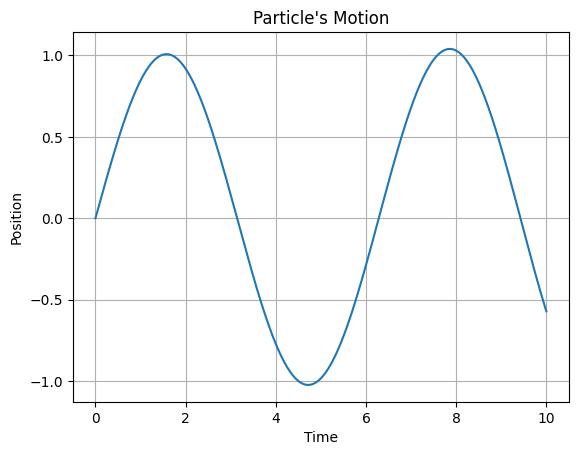

In [154]:
# Plotting the position vs. time
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title("Particle's Motion")
plt.grid(True)
plt.show()

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [161]:
def newton_equation(x, t):
    # Define the force function F(x)
    # Modify this function according to your specific problem
    F = [-k * xi for xi in x]  # Example: Simple harmonic motion with spring constant k

    # Calculate acceleration (second derivative of x with respect to t)
    acceleration = [Fi / m for Fi in F]

    return acceleration

In [157]:
# Parameters
m = 1.0  # Mass of the particle
k = 1.0  # Spring constant

# Initial conditions
x0 = 0.0  # Initial x position
y0 = 0.0  # Initial y position
z0 = 0.0  # Initial z position
v0 = 1.0  # Initial velocity

# Time parameters
t_start = 0.0
t_end = 10.0
dt = 0.01
num_points = int((t_end - t_start) / dt) + 1
t = np.linspace(t_start, t_end, num_points)

In [158]:
# Arrays to store position values
x = np.zeros(num_points)
y = np.zeros(num_points)
z = np.zeros(num_points)

# Set initial values
x[0] = x0
y[0] = y0
z[0] = z0

In [162]:
# Numerical integration using Euler method
for i in range(1, num_points):
    # Calculate acceleration at the current time step
    acceleration = newton_equation([x[i-1], y[i-1], z[i-1]], t[i-1])

    # Update position using Euler method
    x[i] = x[i-1] + v0 * dt
    y[i] = y[i-1] + v0 * dt
    z[i] = z[i-1] + v0 * dt

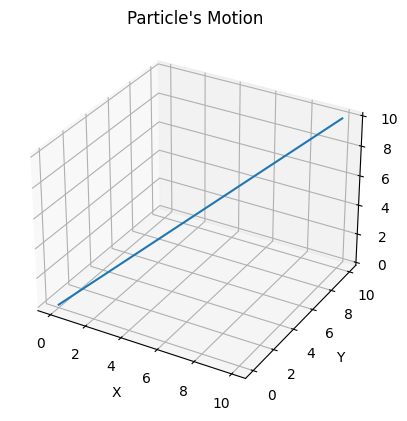

In [163]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Particle's Motion")
plt.show()

# Navier-stokes
---

In [164]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
# Parameters
L = 1.0  # Length of the domain
N = 100  # Number of grid points
nu = 0.1  # Viscosity

# Time parameters
T = 1.0  # Total simulation time
dt = 0.001  # Time step size
num_steps = int(T / dt)  # Number of time steps

# Grid spacing
dx = L / (N - 1)
dy = L / (N - 1)

# Initialize arrays
u = np.zeros((N, N))  # x-velocity component
v = np.zeros((N, N))  # y-velocity component
p = np.zeros((N, N))  # Pressure

In [ ]:
# Main loop
for step in range(num_steps):
    # Solve for intermediate velocity u*
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            u[i, j] = (u[i, j] -
                       dt * u[i, j] * (u[i, j] - u[i - 1, j]) / dx -
                       dt * v[i, j] * (u[i, j] - u[i, j - 1]) / dy +
                       nu * dt / dx**2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                       nu * dt / dy**2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

            v[i, j] = (v[i, j] -
                       dt * u[i, j] * (v[i, j] - v[i - 1, j]) / dx -
                       dt * v[i, j] * (v[i, j] - v[i, j - 1]) / dy +
                       nu * dt / dx**2 * (v[i + 1, j] - 2 * v[i, j] + v[i - 1, j]) +
                       nu * dt / dy**2 * (v[i, j + 1] - 2 * v[i, j] + v[i, j - 1]))

    # Apply boundary conditions
    u[0, :] = 0.0  # u at bottom boundary
    u[N - 1, :] = 0.0  # u at top boundary
    u[:, 0] = 0.0  # u at left boundary
    u[:, N - 1] = 1.0  # u at right boundary

    v[0, :] = 0.0  # v at bottom boundary
    v[N - 1, :] = 0.0  # v at top boundary
    v[:, 0] = 0.0  # v at left boundary
    v[:, N - 1] = 0.0  # v at right boundary

    # Solve for pressure
    for itr in range(50):
        pn = p.copy()

        for i in range(1, N - 1):
            for j in range(1, N - 1):
                p[i, j] = (((pn[i, j + 1] + pn[i, j - 1]) * dy**2 +
                            (pn[i + 1, j] + pn[i - 1, j]) * dx**2) /
                           (2 * (dx**2 + dy**2)) -
                           dx**2 * dy**2 / (2 * (dx**2 + dy**2)) *
                           (1 / dx**2 * (u[i + 1, j] - u[i - 1, j]) +
                            1 / dy**2 * (v[i, j + 1] - v[i, j - 1])))

        # Apply boundary conditions for pressure
        p[0, :] = p[1, :]  # p at bottom boundary
        p[N - 1, :] = p[N - 2, :]  # p at top boundary
        p[:, 0] = p[:, 1]  # p at left boundary
        p[:, N - 1] = p[:, N - 2]  # p at right boundary

    # Correct velocity using pressure
    u[1:-1, 1:-1] -= dt / dx * (p[2:, 1:-1] - p[:-2, 1:-1])
    v[1:-1, 1:-1] -= dt / dy * (p[1:-1, 2:] - p[1:-1, :-2])

In [ ]:
# Create a quiver plot of the velocity field
X, Y = np.meshgrid(np.linspace(0, L, N), np.linspace(0, L, N))
plt.figure()
plt.quiver(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Velocity Field')
plt.show()

In [ ]:
import torch
import numpy as np

In [ ]:
def grad(outputs, inputs):
    """Computes the partial derivative of
    an output with respect to an input.
    Args:
        outputs: (N, 1) tensor
        inputs: (N, D) tensor
    """
    return torch.autograd.grad(
        outputs, inputs, grad_outputs=torch.ones_like(outputs), create_graph=True
    )


def cooling_law(time, Tenv, T0, R):
    T = Tenv + (T0 - Tenv) * np.exp(-R * time)
    return T

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as thdat

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def np_to_th(x):
    n_samples = len(x)
    return torch.from_numpy(x).to(torch.float).to(DEVICE).reshape(n_samples, -1)


class Net(nn.Module):
    def __init__(
        self,
        input_dim,
        output_dim,
        n_units=100,
        epochs=1000,
        loss=nn.MSELoss(),
        lr=1e-3,
        loss2=None,
        loss2_weight=0.1,
    ) -> None:
        super().__init__()

        self.epochs = epochs
        self.loss = loss
        self.loss2 = loss2
        self.loss2_weight = loss2_weight
        self.lr = lr
        self.n_units = n_units

        self.layers = nn.Sequential(
            nn.Linear(input_dim, self.n_units),
            nn.ReLU(),
            nn.Linear(self.n_units, self.n_units),
            nn.ReLU(),
            nn.Linear(self.n_units, self.n_units),
            nn.ReLU(),
            nn.Linear(self.n_units, self.n_units),
            nn.ReLU(),
        )
        self.out = nn.Linear(self.n_units, output_dim)

    def forward(self, x):
        h = self.layers(x)
        out = self.out(h)

        return out

    def fit(self, X, y):
        Xt = np_to_th(X)
        yt = np_to_th(y)

        optimiser = optim.Adam(self.parameters(), lr=self.lr)
        self.train()
        losses = []
        for ep in range(self.epochs):
            optimiser.zero_grad()
            outputs = self.forward(Xt)
            loss = self.loss(yt, outputs)
            if self.loss2:
                loss += self.loss2_weight + self.loss2_weight * self.loss2(self)
            loss.backward()
            optimiser.step()
            losses.append(loss.item())
            if ep % int(self.epochs / 10) == 0:
                print(f"Epoch {ep}/{self.epochs}, loss: {losses[-1]:.2f}")
        return losses

    def predict(self, X):
        self.eval()
        out = self.forward(np_to_th(X))
        return out.detach().cpu().numpy()


class NetDiscovery(Net):
    def __init__(
        self,
        input_dim,
        output_dim,
        n_units=100,
        epochs=1000,
        loss=nn.MSELoss(),
        lr=0.001,
        loss2=None,
        loss2_weight=0.1,
    ) -> None:
        super().__init__(
            input_dim, output_dim, n_units, epochs, loss, lr, loss2, loss2_weight
        )

        self.r = nn.Parameter(data=torch.tensor([0.]))

In [ ]:
import numpy as np
from sklearn import linear_model, preprocessing, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
def create_data(n_points):
    x = np.linspace(-10, 10, n_points)
    y = x**2 + 5*x + 1 + 5* np.random.randn(n_points)
    return x, y
x, y = create_data(100)
plt.plot(x,y, '.')

In [ ]:
np.random.seed(1)
# Create models
model = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),
    ('scaler', preprocessing.StandardScaler()),
    ('model', linear_model.LinearRegression())
    ])
model_l2 = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),
    ('scaler', preprocessing.StandardScaler()),
    ('model', linear_model.Ridge(alpha=1))
    ])

In [ ]:
x, y = create_data(8)

In [ ]:
model.fit(x.reshape(-1,1), y.reshape(-1,1))
model_l2.fit(x.reshape(-1,1), y.reshape(-1,1))

# Create test data
x_pred = np.linspace(-15, 15, 1000).reshape(-1, 1)

y_pred = model.predict(x_pred)
y_pred_l2 = model_l2.predict(x_pred)

In [ ]:
plt.plot(x,y, 'o', label='Data')
plt.plot(x_pred, x_pred**2 + 5*x_pred + 1, label='Equation', color='b')
plt.plot(x_pred, y_pred, label='No Regularisation')
plt.plot(x_pred, y_pred_l2, label='With Regularisation')
plt.ylim(-60, 200)
plt.legend()

In [ ]:
import functools

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)

In [ ]:
np.random.seed(10)

Tenv = 25
T0 = 100
R = 0.005
times = np.linspace(0, 1000, 1000)
eq = functools.partial(cooling_law, Tenv=Tenv, T0=T0, R=R)
temps = eq(times)

# Make training data
t = np.linspace(0, 300, 10)
T = eq(t) +  2 * np.random.randn(10)

In [ ]:
plt.plot(times, temps)
plt.plot(t, T, 'o')
plt.legend(['Equation', 'Training data'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')

In [ ]:
net = Net(1,1, loss2=None, epochs=20000, lr=1e-5).to(DEVICE)

losses = net.fit(t, T)

plt.plot(losses)
plt.yscale('log')

In [ ]:
def l2_reg(model: torch.nn.Module):
    return torch.sum(sum([p.pow(2.) for p in model.parameters()]))

In [ ]:
netreg = Net(1,1, loss2=l2_reg, epochs=20000, lr=1e-4, loss2_weight=1).to(DEVICE)

losses = netreg.fit(t, T)

plt.plot(losses)
plt.yscale('log')

In [ ]:
predsreg = netreg.predict(times)

preds = net.predict(times)
plt.plot(times, temps, alpha=0.8)
plt.plot(t, T, 'o')
plt.plot(times, preds, alpha=0.8)
plt.plot(times, predsreg, alpha=0.8)

plt.legend(labels=['Equation','Training data', 'Network', 'L2 Network'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')

In [ ]:
def physics_loss(model: torch.nn.Module):
    ts = torch.linspace(0, 1000, steps=1000,).view(-1,1).requires_grad_(True).to(DEVICE)
    temps = model(ts)
    dT = grad(temps, ts)[0]
    pde = R*(Tenv - temps) - dT

    return torch.mean(pde**2)

In [ ]:
net = Net(1,1, loss2=physics_loss, epochs=30000, loss2_weight=1, lr=1e-5).to(DEVICE)

losses = net.fit(t, T)
plt.plot(losses)
plt.yscale('log')

In [ ]:
preds = net.predict(times)

plt.plot(times, temps, alpha=0.8)
plt.plot(t, T, 'o')
plt.plot(times, preds, alpha=0.8)
plt.legend(labels=['Equation','Training data', 'PINN'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')

In [ ]:
def physics_loss_discovery(model: torch.nn.Module):
    ts = torch.linspace(0, 1000, steps=1000,).view(-1,1).requires_grad_(True).to(DEVICE)
    temps = model(ts)
    dT = grad(temps, ts)[0]
    pde = model.r * (Tenv - temps) - dT

    return torch.mean(pde**2)

In [ ]:
netdisc = NetDiscovery(1, 1, loss2=physics_loss_discovery, loss2_weight=1, epochs=40000, lr= 5e-6).to(DEVICE)

losses = netdisc.fit(t, T)
plt.plot(losses)
plt.yscale('log')

In [ ]:
preds = netdisc.predict(times)
print(netdisc.r)

plt.plot(times, temps, alpha=0.8)
plt.plot(t, T, 'o')
plt.plot(times, preds, alpha=0.8)
plt.legend(labels=['Equation','Training data', 'discovery PINN'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')